In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train test split
from sklearn.model_selection import train_test_split
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('D:/DS/aspiration.ai/ASHOKA.csv')

In [3]:
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,494
Total Missing (%),0.0%
Total size in memory,58.0 KiB
Average record size in memory,120.2 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,10


For Bollinger Bands:

* 1. The 14 day rolling mean of the closing price (we call it the average) 
* 2. Upper band which is the rolling mean + 2 standard deviations away from the average. 
* 3. Lower band which is the rolling mean - 2 standard deviations away from the average. 
* 4. Average Daily stock price.

In [4]:
x = df['Close Price'].rolling(14).mean()

In [5]:
df_std = df['Close Price'].std()

In [6]:
y1 = x + 2*df_std

In [7]:
y2 = x - 2*df_std

In [8]:
z = np.array(df['Average Price'])

In [9]:
x.shape

(494,)

In [10]:
y1.shape

(494,)

In [11]:
y2.shape

(494,)

In [12]:
z.shape

(494,)

In [13]:
df['x'] = x
df['y1'] = y1
df['y2'] = y2
df['z'] = z

In [14]:
df.sample(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,x,y1,y2,z
414,ASHOKA,EQ,14-Jan-2019,130.70,132.15,137.00,130.00,130.05,130.75,131.00,40582,5.316070e+06,1260,19496,48.04,127.617857,231.409162,23.826552,131.00
292,ASHOKA,EQ,13-Jul-2018,164.45,165.00,165.95,157.00,158.00,160.00,162.08,173078,2.805186e+07,5379,39556,22.85,220.739286,324.530591,116.947981,162.08
47,ASHOKA,EQ,20-Jul-2017,189.70,189.30,193.00,186.55,186.75,187.10,188.88,89424,1.689017e+07,2268,67225,75.18,189.135714,292.927019,85.344409,188.88
69,ASHOKA,EQ,22-Aug-2017,183.70,186.10,186.90,184.00,186.60,186.10,185.66,27850,5.170519e+06,647,15830,56.84,184.103571,287.894877,80.312266,185.66
171,ASHOKA,EQ,17-Jan-2018,236.00,236.00,237.85,226.50,227.95,227.75,233.06,648335,1.511012e+08,5950,602193,92.88,243.932143,347.723448,140.140838,233.06


Dropping unnecessary features vectors.

In [15]:
df = df.drop(['Series', 'Symbol', 'Turnover', 'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty'], axis = 1)

In [16]:
df.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,x,y1,y2,z
0,15-May-2017,210.35,211.0,217.5,206.15,216.30,216.05,212.63,159997,NaN,NaN,NaN,212.63
1,16-May-2017,216.05,212.3,216.0,211.00,214.00,214.90,213.24,213214,NaN,NaN,NaN,213.24
2,17-May-2017,214.90,214.3,218.7,212.10,216.55,217.00,215.97,383131,NaN,NaN,NaN,215.97
3,18-May-2017,217.00,216.0,216.6,208.00,210.00,209.65,211.74,78709,NaN,NaN,NaN,211.74
4,19-May-2017,209.65,212.1,213.9,205.05,206.05,206.25,209.95,398725,NaN,NaN,NaN,209.95


In [17]:
df['x'] = df['x'].fillna((df['x'].mean()))
df['y1'] = df['y1'].fillna((df['y1'].mean()))
df['y2'] = df['y2'].fillna((df['y2'].mean()))

In [18]:
def label_call(df):
   if (df['z'] < df['y2']):
      return 'Buy'
   if (df['z'] > df['y2'] and df['z'] < df['x']):
      return 'Hold Buy/ Liquidate Short'
   if (df['z'] < df['y1'] and df['z'] > df['x']):
      return 'Hold Short/ Liquidate Buy'
   if (df['z'] > df['y1']):
      return 'Short'
   return 'NA'

In [19]:
df['Call'] = df.apply(label_call, axis=1)

In [20]:
df.sample(5)

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,x,y1,y2,z,Call
196,23-Feb-2018,219.60,219.5,224.55,219.5,222.0,221.80,223.35,110803,227.189286,330.980591,123.397981,223.35,Hold Buy/ Liquidate Short
181,01-Feb-2018,227.00,232.0,233.95,226.1,232.1,230.00,230.28,500813,232.100000,335.891305,128.308695,230.28,Hold Buy/ Liquidate Short
75,31-Aug-2017,191.25,195.2,198.00,193.3,195.5,195.45,195.61,501451,186.485714,290.277019,82.694409,195.61,Hold Short/ Liquidate Buy
117,01-Nov-2017,212.95,213.0,219.00,203.5,218.0,216.70,214.62,1211278,199.089286,302.880591,95.297981,214.62,Hold Short/ Liquidate Buy
120,06-Nov-2017,231.90,229.0,231.50,222.6,230.5,230.00,227.94,247573,208.439286,312.230591,104.647981,227.94,Hold Short/ Liquidate Buy


In [21]:
df['Call'].dtype

dtype('O')

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
df['Call'] = le.fit_transform(np.asarray(df['Call']))
df['Call'].unique()

array([1, 0], dtype=int64)

In [23]:
df.isnull().any()

Date                     False
Prev Close               False
Open Price               False
High Price               False
Low Price                False
Last Price               False
Close Price              False
Average Price            False
Total Traded Quantity    False
x                        False
y1                       False
y2                       False
z                        False
Call                     False
dtype: bool

Here; x, y1, y2 are the 3 Bollinger Bands.

z is the Average Stock Price.

In [24]:
X = df[['x', 'y1', 'y2', 'z']]
y = df[['Call']]

In [25]:
y = np.asarray(y)

In [26]:
y.shape

(494, 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

6 Classification methods will be implemented on the given dataset.

* Logistic Regression
* Naive Bayes
* Stochastic Gradient Descent
* K- Nearest Neighbors
* Decision Tree
* Support Vector Machine

#### Logistic Regression

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
logreg.score(X_test, y_test)

0.9942196531791907

In [30]:
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

[[95  1]
 [ 0 77]]


In [31]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.99      1.00      0.99        77

   micro avg       0.99      0.99      0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173



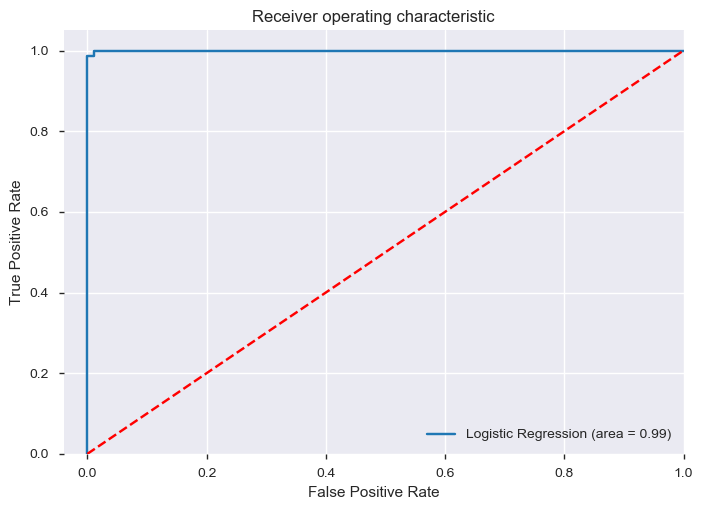

In [32]:
logit_roc_auc = roc_auc_score(y_test, y_pred_log)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Naive Bayes

In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
nb.score(X_test, y_test)

0.653179190751445

In [35]:
confusion_matrix = confusion_matrix(y_test, y_pred_nb)
confusion_matrix

array([[71, 25],
       [35, 42]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        96
           1       0.63      0.55      0.58        77

   micro avg       0.65      0.65      0.65       173
   macro avg       0.65      0.64      0.64       173
weighted avg       0.65      0.65      0.65       173



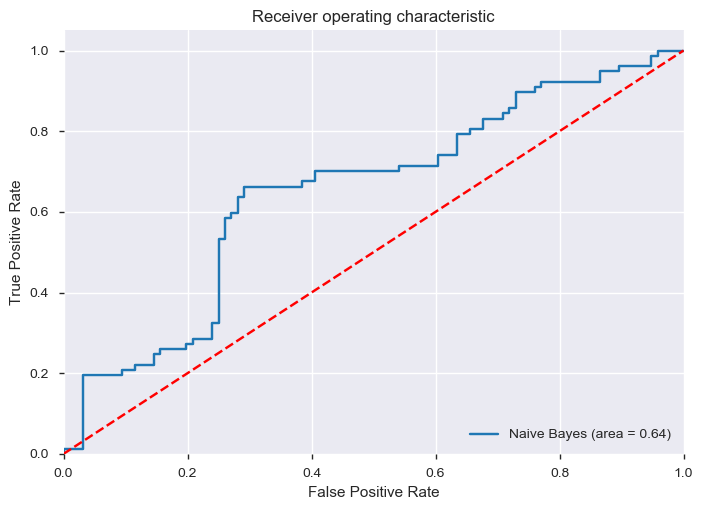

In [37]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Stochastic Gradient Descent

In [38]:
sgd = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
sgd.score(X_test, y_test)

0.6069364161849711

In [40]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.29      0.45        96
           1       0.53      1.00      0.69        77

   micro avg       0.61      0.61      0.61       173
   macro avg       0.77      0.65      0.57       173
weighted avg       0.79      0.61      0.56       173



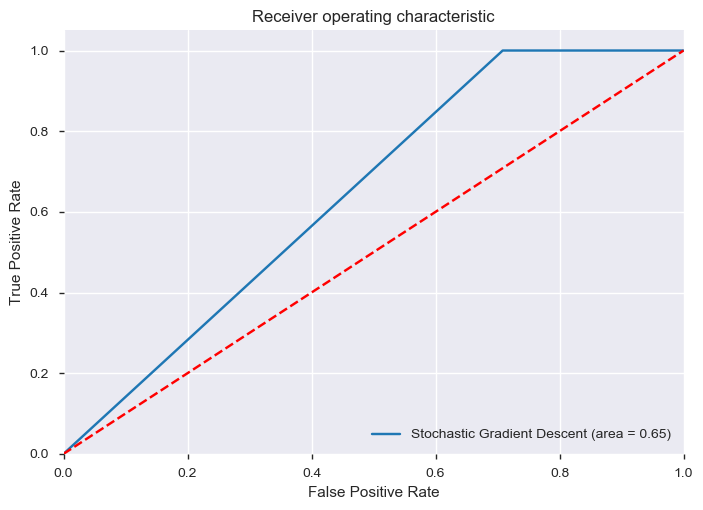

In [41]:
sgd_roc_auc = roc_auc_score(y_test, y_pred_sgd)
fpr, tpr, thresholds = roc_curve(y_test, sgd.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stochastic Gradient Descent (area = %0.2f)' % sgd_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [43]:
knn.score(X_test, y_test)

0.8959537572254336

In [44]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        96
           1       0.86      0.91      0.89        77

   micro avg       0.90      0.90      0.90       173
   macro avg       0.89      0.90      0.90       173
weighted avg       0.90      0.90      0.90       173



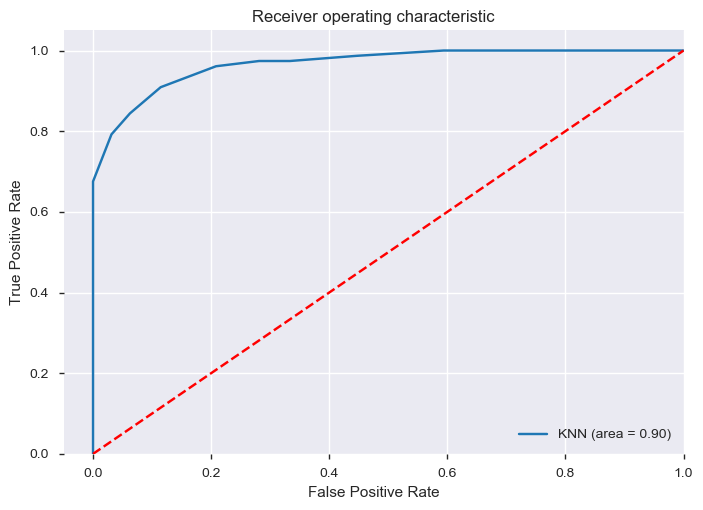

In [45]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree

In [46]:
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 10, max_features = None, min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [47]:
dtree.score(X_test, y_test)

0.8092485549132948

In [48]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        96
           1       0.83      0.71      0.77        77

   micro avg       0.81      0.81      0.81       173
   macro avg       0.81      0.80      0.80       173
weighted avg       0.81      0.81      0.81       173



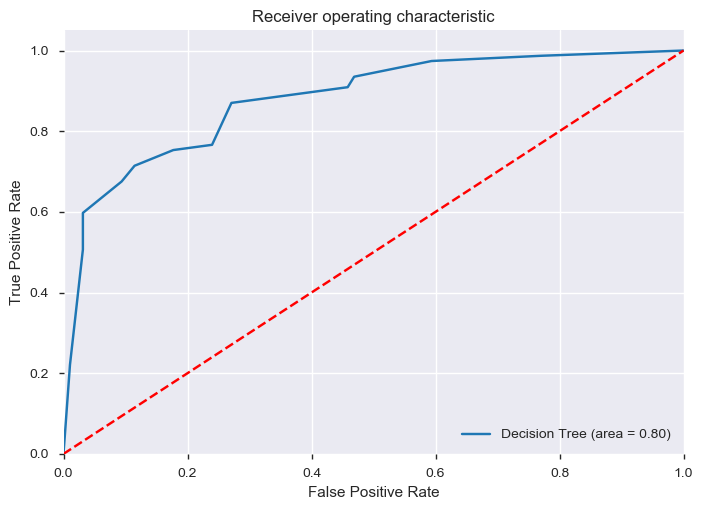

In [49]:
dtree_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Classifier

In [50]:
rfm = RandomForestClassifier(n_jobs = 10, random_state = 42)
rfm.fit(X_train, y_train)
y_pred_rfm = rfm.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [51]:
rfm.score(X_test, y_test)

0.8959537572254336

In [52]:
print(classification_report(y_test,y_pred_rfm))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        96
           1       0.88      0.88      0.88        77

   micro avg       0.90      0.90      0.90       173
   macro avg       0.89      0.89      0.89       173
weighted avg       0.90      0.90      0.90       173



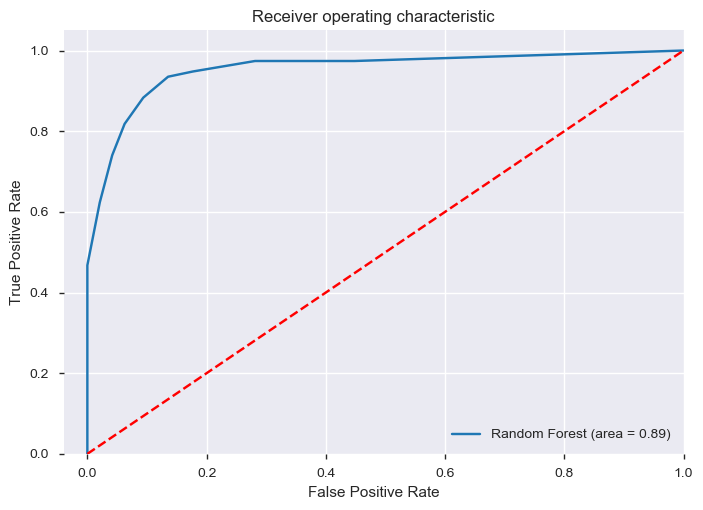

In [53]:
rfm_roc_auc = roc_auc_score(y_test, y_pred_rfm)
fpr, tpr, thresholds = roc_curve(y_test, rfm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine

In [54]:
svm = SVC(kernel = 'linear', C = 0.025, random_state = 100, probability = True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
svm.score(X_test, y_test)

0.9826589595375722

In [56]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        96
           1       0.97      0.99      0.98        77

   micro avg       0.98      0.98      0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173



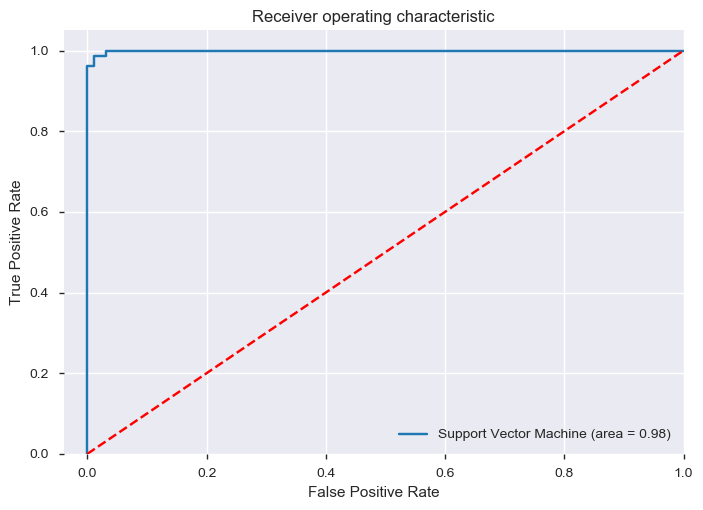

In [57]:
svm_roc_auc = roc_auc_score(y_test, y_pred_svm)
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Performance of the classifiers:

LogisticRegression ~ SVM > KNN ~ Random Forest > Decision Tree > Naive Bayes > Stochastic Gradient Descent

# -----------------------------------------------------------------------------------------------------------

In [58]:
df2 = pd.read_csv('D:/DS/aspiration.ai/FORTIS.csv')

In [59]:
df2.sample(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
335,FORTIS,EQ,14-Sep-2018,143.90,144.85,146.50,143.70,144.85,144.85,144.85,3775219,5.468562e+08,9894,2985590,79.08
54,FORTIS,EQ,28-Jul-2017,163.65,163.00,164.90,157.70,159.05,159.10,161.10,6178056,9.952707e+08,27648,3423744,55.42
224,FORTIS,EQ,06-Apr-2018,137.85,139.00,144.95,134.60,138.60,138.80,141.10,21556741,3.041747e+09,95399,6813946,31.61
67,FORTIS,EQ,17-Aug-2017,151.05,151.00,152.85,148.60,150.60,151.45,151.14,3669508,5.546227e+08,23955,1598886,43.57
97,FORTIS,EQ,29-Sep-2017,145.50,146.60,148.85,143.15,143.80,144.00,145.94,1628660,2.376811e+08,11468,491656,30.19


In [60]:
df2 = df2.drop(['Symbol', 'Series', 'Date', 'Prev Close', 'Last Price', 'Turnover', 'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty'], axis = 1)

In [61]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity
0,208.40,209.65,204.05,205.25,205.66,9078354
1,206.25,209.45,205.45,207.90,207.86,2146212
2,208.00,210.80,204.90,205.90,208.01,3032479
3,204.00,205.25,195.00,196.85,200.05,2852401
4,197.80,204.90,196.45,203.55,200.95,4144993


In [62]:
df2['5_rolling_mean'] = df2['Close Price'].rolling(5).mean()
df2['5_rolling_std'] = df2['Close Price'].rolling(5).std()

In [63]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity,5_rolling_mean,5_rolling_std
0,208.40,209.65,204.05,205.25,205.66,9078354,NaN,NaN
1,206.25,209.45,205.45,207.90,207.86,2146212,NaN,NaN
2,208.00,210.80,204.90,205.90,208.01,3032479,NaN,NaN
3,204.00,205.25,195.00,196.85,200.05,2852401,NaN,NaN
4,197.80,204.90,196.45,203.55,200.95,4144993,203.89,4.232228


In [64]:
df2['5_rolling_mean'].mean()

147.01875763747444

In [65]:
df2['5_rolling_std'].mean()

2.9616913137279925

In [66]:
df2.shape

(495, 8)

In [67]:
df2['5_rolling_mean'] = df2['5_rolling_mean'].fillna(df2['5_rolling_mean'].mean())
df2['5_rolling_std'] = df2['5_rolling_std'].fillna(df2['5_rolling_std'].mean())

In [68]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity,5_rolling_mean,5_rolling_std
0,208.40,209.65,204.05,205.25,205.66,9078354,147.018758,2.961691
1,206.25,209.45,205.45,207.90,207.86,2146212,147.018758,2.961691
2,208.00,210.80,204.90,205.90,208.01,3032479,147.018758,2.961691
3,204.00,205.25,195.00,196.85,200.05,2852401,147.018758,2.961691
4,197.80,204.90,196.45,203.55,200.95,4144993,203.890000,4.232228


In [69]:
df2.shape

(495, 8)

In [70]:
per_oc = pd.DataFrame(df2['Open Price'])
per_oc['Close Price'] = df2['Close Price']

In [71]:
per_oc.head()

,Open Price,Close Price
0,208.40,205.25
1,206.25,207.90
2,208.00,205.90
3,204.00,196.85
4,197.80,203.55


In [72]:
per_oc['per_change_oc'] = per_oc['Close Price'] / per_oc['Open Price'] - 1

In [73]:
per_oc.head()

,Open Price,Close Price,per_change_oc
0,208.40,205.25,-0.015115
1,206.25,207.90,0.008000
2,208.00,205.90,-0.010096
3,204.00,196.85,-0.035049
4,197.80,203.55,0.029070


In [74]:
df2['per_change_oc'] = per_oc['per_change_oc']

In [75]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity,5_rolling_mean,5_rolling_std,per_change_oc
0,208.40,209.65,204.05,205.25,205.66,9078354,147.018758,2.961691,-0.015115
1,206.25,209.45,205.45,207.90,207.86,2146212,147.018758,2.961691,0.008000
2,208.00,210.80,204.90,205.90,208.01,3032479,147.018758,2.961691,-0.010096
3,204.00,205.25,195.00,196.85,200.05,2852401,147.018758,2.961691,-0.035049
4,197.80,204.90,196.45,203.55,200.95,4144993,203.890000,4.232228,0.029070


In [76]:
per_hl = pd.DataFrame(df2['High Price'])
per_hl['Low Price'] = df2['Low Price']

In [77]:
per_hl.head()

,High Price,Low Price
0,209.65,204.05
1,209.45,205.45
2,210.80,204.90
3,205.25,195.00
4,204.90,196.45


In [78]:
per_hl['per_change_hl'] = per_hl['High Price'] / per_hl['Low Price'] - 1

In [79]:
per_hl.head()

,High Price,Low Price,per_change_hl
0,209.65,204.05,0.027444
1,209.45,205.45,0.019469
2,210.80,204.90,0.028795
3,205.25,195.00,0.052564
4,204.90,196.45,0.043013


In [80]:
df2['per_change_hl'] = per_hl['per_change_hl']

In [81]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity,5_rolling_mean,5_rolling_std,per_change_oc,per_change_hl
0,208.40,209.65,204.05,205.25,205.66,9078354,147.018758,2.961691,-0.015115,0.027444
1,206.25,209.45,205.45,207.90,207.86,2146212,147.018758,2.961691,0.008000,0.019469
2,208.00,210.80,204.90,205.90,208.01,3032479,147.018758,2.961691,-0.010096,0.028795
3,204.00,205.25,195.00,196.85,200.05,2852401,147.018758,2.961691,-0.035049,0.052564
4,197.80,204.90,196.45,203.55,200.95,4144993,203.890000,4.232228,0.029070,0.043013


In [82]:
df2['Action'] = np.where(df2['Close Price'].shift(-1) > df2['Close Price'], 1, -1)

In [83]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity,5_rolling_mean,5_rolling_std,per_change_oc,per_change_hl,Action
0,208.40,209.65,204.05,205.25,205.66,9078354,147.018758,2.961691,-0.015115,0.027444,1
1,206.25,209.45,205.45,207.90,207.86,2146212,147.018758,2.961691,0.008000,0.019469,-1
2,208.00,210.80,204.90,205.90,208.01,3032479,147.018758,2.961691,-0.010096,0.028795,-1
3,204.00,205.25,195.00,196.85,200.05,2852401,147.018758,2.961691,-0.035049,0.052564,1
4,197.80,204.90,196.45,203.55,200.95,4144993,203.890000,4.232228,0.029070,0.043013,-1


In [84]:
df2['Action'].value_counts()

-1    266
 1    229
Name: Action, dtype: int64

In [85]:
df2['per_change'] = df2['Close Price'].pct_change()

In [86]:
df2['per_change'] = df2['per_change'].fillna(df2['per_change'].mean())

In [87]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity,5_rolling_mean,5_rolling_std,per_change_oc,per_change_hl,Action,per_change
0,208.40,209.65,204.05,205.25,205.66,9078354,147.018758,2.961691,-0.015115,0.027444,1,-0.000577
1,206.25,209.45,205.45,207.90,207.86,2146212,147.018758,2.961691,0.008000,0.019469,-1,0.012911
2,208.00,210.80,204.90,205.90,208.01,3032479,147.018758,2.961691,-0.010096,0.028795,-1,-0.009620
3,204.00,205.25,195.00,196.85,200.05,2852401,147.018758,2.961691,-0.035049,0.052564,1,-0.043953
4,197.80,204.90,196.45,203.55,200.95,4144993,203.890000,4.232228,0.029070,0.043013,-1,0.034036


In [88]:
X = df2[['5_rolling_mean', '5_rolling_std', 'per_change_oc', 'per_change_hl']]
y = df2[['Action']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

Random Forest Classifier

In [90]:
rfm = RandomForestClassifier(n_jobs = 10, random_state = 42)#,max_features=None,min_samples_leaf=30)

In [91]:
rfm.fit(X_train, y_train)
y_pred_rfm = rfm.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [92]:
rfm.score(X_test, y_test)

0.5604838709677419

In [93]:
print(classification_report(y_test,y_pred_rfm))

              precision    recall  f1-score   support

          -1       0.59      0.66      0.63       138
           1       0.51      0.44      0.47       110

   micro avg       0.56      0.56      0.56       248
   macro avg       0.55      0.55      0.55       248
weighted avg       0.56      0.56      0.56       248



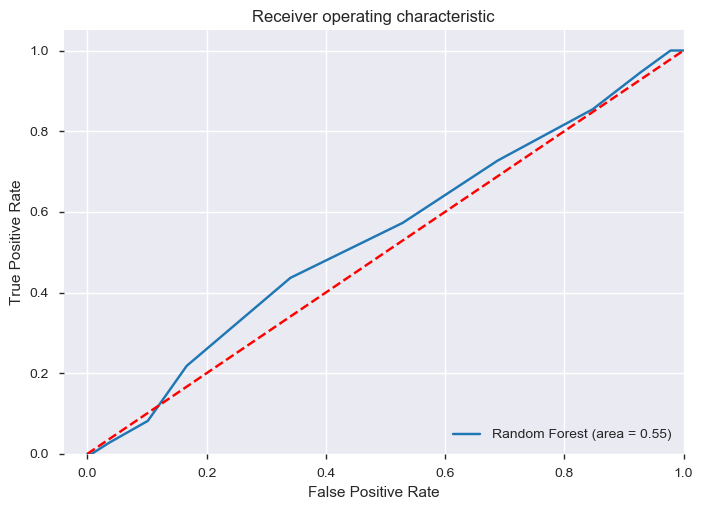

In [94]:
rfm_roc_auc = roc_auc_score(y_test, y_pred_rfm)
fpr, tpr, thresholds = roc_curve(y_test, rfm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Finding Cumulative returns using np.cumprod() and plotting.

In [95]:
df2['Action'].value_counts()

-1    266
 1    229
Name: Action, dtype: int64

(-1.1, 1.1)

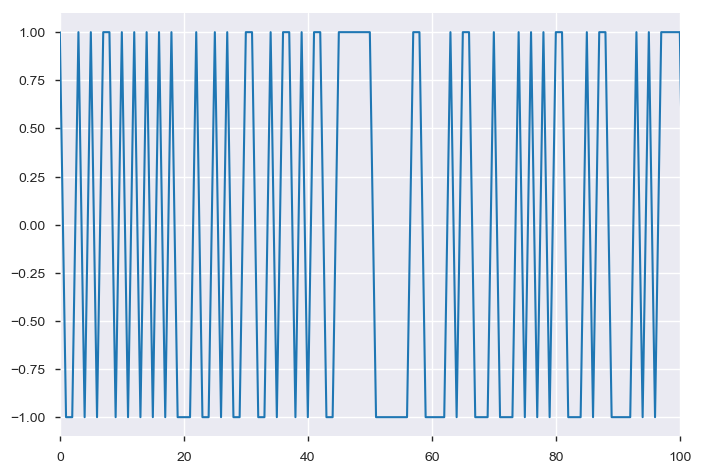

In [96]:
df2['Action'].plot(lw=1.5)
plt.xlim([0, 100])
plt.ylim([-1.1, 1.1])

In [97]:
df2['Market'] = np.log(df2['Close Price'] / df2['Close Price'].shift(1))

In [98]:
df2['Strategy'] = df2['Action'].shift(1) * df2['Market']

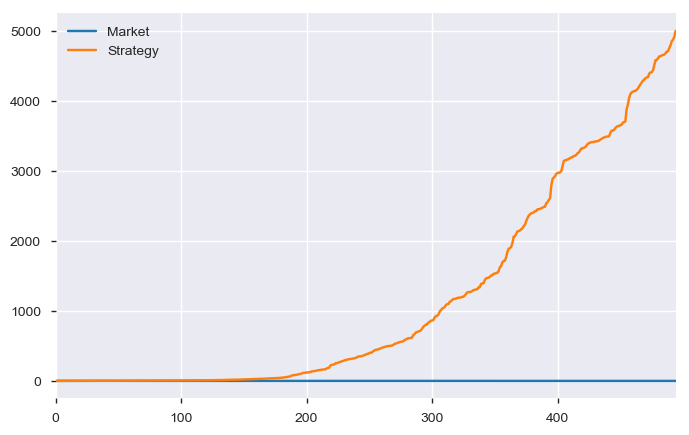

In [99]:
df2[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8, 5))

### Model Tuning for better performance in Random Forest Classification.

In [100]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier()

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=1000000)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.7s finished
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, ...9, 49, 49, 49, 49, 49, 49, 49, 49, 50], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dis

In [101]:
rs.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'max_leaf_nodes': 17,
 'max_features': 0.7999999999999999,
 'max_depth': 12,
 'bootstrap': True}

In [102]:
best_model = rs.best_estimator_

In [103]:
rf2_pred = best_model.predict(X_test)
rf2_prob = best_model.predict_proba(X_test)[:, 1]

In [104]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 33
Average maximum depth 9


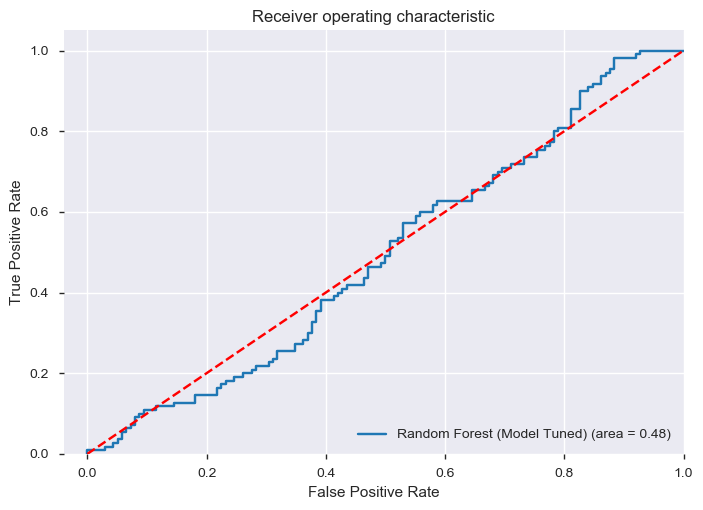

In [105]:
rf2_roc_auc = roc_auc_score(y_test, rf2_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf2_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Model Tuned) (area = %0.2f)' % rf2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Hyperparameter tuning using GridSearchCV and KFold Cross Validation

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 10)]
max_depth.append(None)
max_features = ['auto', 'sqrt']

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
}

estimator = RandomForestClassifier(random_state = 69)
cv_test = KFold(n_splits=5)
gscv = GridSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = cv_test, 
                        verbose = 2)

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    5.3s finished
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=69, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'max_depth': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50, None], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [109]:
gscv.best_params_

{'max_depth': 1, 'max_features': 'auto', 'n_estimators': 15}

In [110]:
best_model = gscv.best_estimator_

In [111]:
best_model.score(X_test,y_test)

0.532258064516129

In [112]:
rf2_pred = best_model.predict(X_test)
rf2_prob = best_model.predict_proba(X_test)[:, 1]

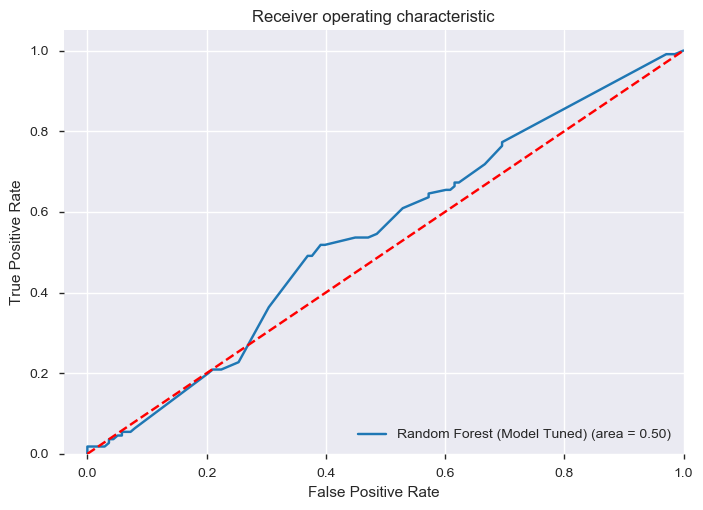

In [113]:
rf2_roc_auc = roc_auc_score(y_test, rf2_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf2_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Model Tuned) (area = %0.2f)' % rf2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()